In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import yaml

# Cargando Yaml
with open("../config.yaml", "r", encoding="utf-8") as file:
    config = yaml.safe_load(file)

# Importando modulos
import sys
from pathlib import Path

parent_folder = str(Path.cwd().parent)
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

from src import models as m

In [4]:
# Cargando Base de Datos
df = pd.read_excel(r"../Data/DF_Pred_4.xlsx")

In [18]:
# Cargando Base de Datos
df1 = pd.read_excel(r"../Data/Final_DF.xlsx")

In [19]:
# comprobar si en df1 existe la columna 'bdnf'
if 'bdnf' in df1.columns:
    print("✓ La columna 'bdnf' SÍ existe en el dataframe df1")
    print(f"  Tipo de dato: {df1['bdnf'].dtype}")
    print(f"  Valores no nulos: {df1['bdnf'].notna().sum()} de {len(df1)}")
    print(f"  Primeros valores:\n{df1['bdnf'].head()}")
else:
    print("✗ La columna 'bdnf' NO existe en el dataframe df1")
    print(f"\nColumnas disponibles ({len(df1.columns)}):")
    print(df1.columns.tolist())

✓ La columna 'bdnf' SÍ existe en el dataframe df1
  Tipo de dato: float64
  Valores no nulos: 168 de 168
  Primeros valores:
0    29.510623
1    16.723394
2    32.674183
3    14.608062
4    22.537906
Name: bdnf, dtype: float64


In [17]:
# Verificar si la variable 'bdnf' existe en el dataframe
if 'bdnf' in df.columns:
    print("✓ La columna 'bdnf' SÍ existe en el dataframe")
    print(f"  Tipo de dato: {df['bdnf'].dtype}")
    print(f"  Valores no nulos: {df['bdnf'].notna().sum()} de {len(df)}")
    print(f"  Primeros valores:\n{df['bdnf'].head()}")
else:
    print("✗ La columna 'bdnf' NO existe en el dataframe")
    print(f"\nColumnas disponibles ({len(df.columns)}):")
    print(df.columns.tolist())

✗ La columna 'bdnf' NO existe en el dataframe

Columnas disponibles (423):
['frec_alcohol_audit', 'puntaje_audit', 'Palabras_moca', 'memoria_moca', 'puntaje_moca', 'edad', 'edo_civil', 'personas_hogar', 'nivel_e', 'ejercicio', 'af_trabajo', 'af_libre', 'cafe', 'tipo_dieta', 'tabaco', 'alcohol', 'tipo_alcohol', 'frec_alcohol', 'alergias_alim', 'horas_sueño', 'horas_sueño_fs', 'descansa', 'siesta', 'cambios_apetito', 'cambios_sueño', 'int_quirugica', 'covid', 'fam_cardiacos', 'fam_acvascular', 'fam_obesidad', 'fam_diabetes', 'fam_colesterol', 'fam_hta', 'fam_enfgastro', 'otras_med', 'vitaminas', 'suplementos', 'prebioticos', 'pcr', 'glucosa', 'bun', 'creatinina', 'filtrado_glomerular', 'ac_urico', 'trigliceridos', 'asat', 'alat', 'ggt', 'bilirrubina_total', 'fosfatasa_alcalina', 'ldh', 'proteinas_totales', 'albumina', 'amilasa', 'lipasa', 'sodio', 'potasio', 'cloro', 'calcio', 'fosforo', 'magnesio', 'hierro', 'densidad_orina', 'ph_orina', 'hemoglobina_orina', 'leucocitos_orina', 'urobili

# MODELOS PARA LA VARIABLE **DELTA BDNF**

## Filtrado De Variables

Dada nuestra previa entrega, se utilizarán las variables más importantes en la RFECV

In [5]:
# Cargando las variables más importantes según RFECV 1
df_ranking = pd.read_excel('../Entregables/UdeBarcelona/RFECV.xlsx')

selected_features_xg = df_ranking.loc[df_ranking['Ranking'] == 1, 'Feature']

# Cargando las variables más importantes según RFECV 2
df_ranking = pd.read_excel('../Entregables/UdeBarcelona/RFECV_Lasso.xlsx')

selected_features_lasso = df_ranking.loc[df_ranking['Ranking'] == 1, 'Feature']

del df_ranking

In [15]:
# comprobar si en alguno de los rankings aparece la columna 'bdnf'
for fpath in ['../Entregables/UdeBarcelona/RFECV.xlsx',
              '../Entregables/UdeBarcelona/RFECV_Lasso.xlsx']:
    df_ranking = pd.read_excel(fpath)
    print(fpath, '→ contiene bdnf?', 'bdnf' in df_ranking.columns)
    # opcional: ver las primeras columnas
    print(df_ranking.columns.tolist(), '\n')

../Entregables/UdeBarcelona/RFECV.xlsx → contiene bdnf? False
['Feature', 'Ranking', 'Importance'] 

../Entregables/UdeBarcelona/RFECV_Lasso.xlsx → contiene bdnf? False
['Feature', 'Ranking', 'Importance_Coef'] 



In [6]:
# Obteniendo variables únicas de ambos
unique_selected_features = list(set(pd.concat([selected_features_xg, selected_features_lasso])))

> ### Creación de DF X e Y

In [13]:
X_full = df[unique_selected_features]
y = df.loc[:,'delta_bdnf_Int']

# Separación en Train y Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

> ### ENTRENAMIENTO CON TODAS LAS VARIABLES IMPORTANTES
> #### SEGUN AMBAS TECNICAS DE RFECV

In [20]:
results = m.models_comparison_and_train(X_train, y_train, X_test, y_test, config['models_and_params'])

INFO:src.models:Optimizando modelo: Ridge
INFO:src.models:Ridge terminado en 10.26 segundos
INFO:src.models:Optimizando modelo: Lasso
INFO:src.models:Lasso terminado en 1.55 segundos
INFO:src.models:Optimizando modelo: ElasticNet
INFO:src.models:ElasticNet terminado en 3.92 segundos
INFO:src.models:Optimizando modelo: SVR
INFO:src.models:SVR terminado en 3.19 segundos
INFO:src.models:Optimizando modelo: KNN Regressor
INFO:src.models:KNN Regressor terminado en 6.72 segundos
INFO:src.models:Optimizando modelo: Decision Tree
INFO:src.models:Decision Tree terminado en 3.19 segundos
INFO:src.models:Optimizando modelo: MLP Regressor
INFO:src.models:MLP Regressor terminado en 591.03 segundos


In [7]:
# Generando DataFrame Ordenado
results_df_all = (
    pd.DataFrame(results)
      .sort_values("RMSE")
      .reset_index(drop=True)
)

results_df_all

,Modelo,RMSE,MAE,R2,Mejores Hiperparámetros,Tiempo (s)
0,SVR,45.624454,26.750614,0.326475,"{'kernel': 'linear', 'gamma': 'auto', 'epsilon...",0.55
1,Lasso,50.201423,30.747089,0.184563,"{'selection': 'random', 'alpha': 1.0}",0.26
2,KNN Regressor,52.128744,30.978001,0.120749,"{'weights': 'distance', 'p': 1, 'n_neighbors': 5}",1.88
3,ElasticNet,53.452640,28.581706,0.075522,"{'l1_ratio': 0.3, 'alpha': 1.0}",0.65
4,MLP Regressor,54.746034,28.828317,0.030241,"{'solver': 'adam', 'hidden_layer_sizes': [100,...",48.10
5,Ridge,56.823313,29.891480,-0.044748,"{'solver': 'cholesky', 'alpha': 100.0}",2.61
6,Decision Tree,78.411801,46.707459,-0.989396,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.54


> ### ENTRENAMIENTO CON TODAS LAS VARIABLES IMPORTANTES
> #### SEGUN TECNICAS DE RFECV CON LASSO

In [8]:
results_l = m.models_comparison_and_train(X_train[selected_features_lasso], y_train, X_test[selected_features_lasso], y_test, config['models_and_params'])

INFO:src.models:Optimizando modelo: Ridge
INFO:src.models:Ridge terminado en 0.45 segundos
INFO:src.models:Optimizando modelo: Lasso
INFO:src.models:Lasso terminado en 0.28 segundos
INFO:src.models:Optimizando modelo: ElasticNet
INFO:src.models:ElasticNet terminado en 0.62 segundos
INFO:src.models:Optimizando modelo: SVR
INFO:src.models:SVR terminado en 1.71 segundos
INFO:src.models:Optimizando modelo: KNN Regressor
INFO:src.models:KNN Regressor terminado en 0.45 segundos
INFO:src.models:Optimizando modelo: Decision Tree
INFO:src.models:Decision Tree terminado en 0.60 segundos
INFO:src.models:Optimizando modelo: MLP Regressor
INFO:src.models:MLP Regressor terminado en 59.69 segundos


In [9]:
# Generando DataFrame Ordenado
results_df_l = (
    pd.DataFrame(results_l)
      .sort_values("RMSE")
      .reset_index(drop=True)
)

results_df_l

,Modelo,RMSE,MAE,R2,Mejores Hiperparámetros,Tiempo (s)
0,SVR,11.362285,8.561862,0.958228,"{'kernel': 'linear', 'gamma': 0.001, 'epsilon'...",1.71
1,Ridge,11.447149,9.061985,0.957601,"{'solver': 'sag', 'alpha': 1.0}",0.45
2,Lasso,13.113084,10.362509,0.944362,"{'selection': 'random', 'alpha': 0.1}",0.28
3,ElasticNet,16.572712,11.880565,0.911132,"{'l1_ratio': 0.5, 'alpha': 0.1}",0.62
4,MLP Regressor,36.597829,19.000866,0.566620,"{'solver': 'lbfgs', 'hidden_layer_sizes': [50]...",59.69
5,Decision Tree,53.006178,31.762609,0.090901,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.60
6,KNN Regressor,53.580062,27.929991,0.071109,"{'weights': 'distance', 'p': 2, 'n_neighbors': 7}",0.45


> ### ENTRENAMIENTO CON TODAS LAS VARIABLES IMPORTANTES
> #### SEGUN TECNICAS DE RFECV CON XG-BOOST

In [10]:
results_xg = m.models_comparison_and_train(X_train[selected_features_xg], y_train, X_test[selected_features_xg], y_test, config['models_and_params'])

INFO:src.models:Optimizando modelo: Ridge
INFO:src.models:Ridge terminado en 0.47 segundos
INFO:src.models:Optimizando modelo: Lasso
INFO:src.models:Lasso terminado en 0.29 segundos
INFO:src.models:Optimizando modelo: ElasticNet
INFO:src.models:ElasticNet terminado en 0.64 segundos
INFO:src.models:Optimizando modelo: SVR
INFO:src.models:SVR terminado en 0.66 segundos
INFO:src.models:Optimizando modelo: KNN Regressor
INFO:src.models:KNN Regressor terminado en 0.47 segundos
INFO:src.models:Optimizando modelo: Decision Tree
INFO:src.models:Decision Tree terminado en 0.62 segundos
INFO:src.models:Optimizando modelo: MLP Regressor
INFO:src.models:MLP Regressor terminado en 56.01 segundos


In [11]:
# Generando DataFrame Ordenado
results_df_xg = (
    pd.DataFrame(results_xg)
      .sort_values("RMSE")
      .reset_index(drop=True)
)

results_df_xg

,Modelo,RMSE,MAE,R2,Mejores Hiperparámetros,Tiempo (s)
0,SVR,55.385941,33.555069,0.007439,"{'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0....",0.66
1,MLP Regressor,55.879021,35.131110,-0.010313,"{'solver': 'adam', 'hidden_layer_sizes': [50, ...",56.01
2,KNN Regressor,55.908314,34.461050,-0.011372,"{'weights': 'distance', 'p': 1, 'n_neighbors': 5}",0.47
3,Ridge,56.338384,33.092919,-0.026992,"{'solver': 'svd', 'alpha': 100.0}",0.47
4,ElasticNet,56.533292,33.213172,-0.034110,"{'l1_ratio': 0.1, 'alpha': 10.0}",0.64
5,Lasso,58.085098,34.690302,-0.091661,"{'selection': 'cyclic', 'alpha': 10.0}",0.29
6,Decision Tree,78.411801,46.707459,-0.989396,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.62


## CONCLUSION

El mejor modelo es el SVR (Support Vector Regressor) con kernel lineal. Es el más preciso de la tabla: logró el menor margen de error (RMSE: 11.36, MAE: 8.56) y explica casi el 96% de los datos (R²: 0.958).

Contexto de las 19 Variables (RFE con Lasso)
Este resultado se obtuvo usando únicamente 19 variables clave. Estas fueron seleccionadas mediante Eliminación Recursiva de Características (RFE) con Lasso, un método matemático que filtra y elimina iterativamente el "ruido" o los datos menos útiles, dejando solo las variables más informativas para evitar el sobreajuste.

Interpretabilidad y Discusión Futura
El impacto exacto de estas 19 variables y la interpretabilidad clínica de este modelo se discutirán a fondo con los compañeros del PhD en Nutrición de España. El objetivo de la charla será contrastar el resultado del algoritmo con el criterio experto para asegurar que el modelo tenga sentido biológico y nutricional.

---
# MODELOS PARA LA VARIABLE **BDNF**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Usar Dataset DF_Final
df = pd.read_csv('../Data/DF_Final_No_Filtered.csv')

# Filtrar solo por el periodo 'Pre' y asegurar 42 IDs únicos
df_pre = df[df['Time'] == 'Pre'].drop_duplicates(subset=['id'])

print(f"Total de pacientes únicos (Pre): {len(df_pre)}")

Total de pacientes únicos (Pre): 42


In [31]:
df_pre.head(5)

,id,grupo,frec_alcohol_audit,puntaje_audit,Palabras_moca,memoria_moca,puntaje_moca,edad,edo_civil,personas_hogar,...,num_depo_Dos + Por Día,num_depo_Una Por Día,leucocitos_sed_(1-3),leucocitos_sed_(100-150),leucocitos_sed_(25-30),leucocitos_sed_(3-5),leucocitos_sed_(35-60),leucocitos_sed_(5-10),leucocitos_sed_Moderado,leucocitos_sed_Negativo
0,1,1,2,5,29,4,29,48.71,1,4,...,0,1,0,0,0,0,0,0,0,1
4,2,2,2,2,21,4,28,54.48,2,3,...,0,0,0,0,0,0,0,0,0,1
8,3,1,2,2,18,3,28,41.72,2,3,...,0,0,0,0,0,0,0,0,0,1
12,4,1,0,0,28,2,26,51.14,2,4,...,0,1,0,0,0,0,0,0,0,1
16,5,1,4,5,6,4,28,54.00,2,4,...,0,1,0,0,0,0,0,0,0,1


In [30]:
# comprobar si 'visita' está entre las columnas de df
if 'visita' in df.columns:
    print("La columna 'visita' está presente en df")
else:
    print("La columna 'visita' NO está presente en df")
    print("Columnas disponibles:", df.columns.tolist())

La columna 'visita' NO está presente en df
Columnas disponibles: ['id', 'grupo', 'frec_alcohol_audit', 'puntaje_audit', 'Palabras_moca', 'memoria_moca', 'puntaje_moca', 'edad', 'edo_civil', 'personas_hogar', 'nivel_e', 'trabajo', 'ejercicio', 'af_trabajo', 'af_libre', 'cafe', 'tipo_dieta', 'tabaco', 'alcohol', 'tipo_alcohol', 'frec_alcohol', 'alergias_alim', 'horas_sueño', 'horas_sueño_fs', 'descansa', 'siesta', 'cambios_apetito', 'cambios_sueño', 'int_quirugica', 'covid', 'fam_cardiacos', 'fam_acvascular', 'fam_obesidad', 'fam_diabetes', 'fam_colesterol', 'fam_hta', 'fam_enfgastro', 'aspirina', 'otras_med', 'tranquilizantes', 'vitaminas', 'suplementos', 'prebioticos', 'pcr', 'glucosa', 'bun', 'creatinina', 'filtrado_glomerular', 'ac_urico', 'col_total', 'trigliceridos', 'asat', 'alat', 'ggt', 'bilirrubina_total', 'fosfatasa_alcalina', 'ldh', 'proteinas_totales', 'albumina', 'amilasa', 'lipasa', 'sodio', 'potasio', 'cloro', 'calcio', 'fosforo', 'magnesio', 'hierro', 'densidad_orina', '

In [23]:
df_pre.head(5)

,id,grupo,frec_alcohol_audit,puntaje_audit,Palabras_moca,memoria_moca,puntaje_moca,edad,edo_civil,personas_hogar,...,num_depo_Dos + Por Día,num_depo_Una Por Día,leucocitos_sed_(1-3),leucocitos_sed_(100-150),leucocitos_sed_(25-30),leucocitos_sed_(3-5),leucocitos_sed_(35-60),leucocitos_sed_(5-10),leucocitos_sed_Moderado,leucocitos_sed_Negativo
0,1,1,2,5,29,4,29,48.71,1,4,...,0,1,0,0,0,0,0,0,0,1
4,2,2,2,2,21,4,28,54.48,2,3,...,0,0,0,0,0,0,0,0,0,1
8,3,1,2,2,18,3,28,41.72,2,3,...,0,0,0,0,0,0,0,0,0,1
12,4,1,0,0,28,2,26,51.14,2,4,...,0,1,0,0,0,0,0,0,0,1
16,5,1,4,5,6,4,28,54.00,2,4,...,0,1,0,0,0,0,0,0,0,1


In [24]:
# Preparación de variable objetivo
target = 'bdnf'

# Eliminar columnas que no son predictoras
X = df_pre.drop(columns=['id', 'Time', 'Treatment', target], errors='ignore')
y = df_pre[target]

# Convertir variables de texto a números
X = pd.get_dummies(X, drop_first=True)

# Manejar valores faltantes para cuidar los datos clínicos
X = X.fillna(X.median())
y = y.fillna(y.median())

In [14]:
# Dividir datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [16]:
# Evaluar
y_pred = rf_model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

R² Score: -0.3016
RMSE: 25.2043


### Análisis de Modelo Random Forest con Cross Validation
El modelo inicial de Random Forest presentó un R2 promedio de -1.49 en validación cruzada, con una alta dispersión entre pliegues.

Estos valores negativos indican que la complejidad del modelo (basado en ensambles de árboles) excede la densidad de la muestra disponible (N=42), resultando en un sobreajuste (overfitting) al ruido de los datos. Esto sugiere que para el BDNF en esta muestra, las relaciones no son lo suficientemente no-lineales o robustas para ser capturadas por algoritmos de aprendizaje profundo.

In [17]:
# Reajustar modelo y evitar overfitting
rf_model = RandomForestRegressor(
    n_estimators=50,       # Menos árboles
    max_depth=3,           # Árboles menos profundos (clave con N=42)
    min_samples_leaf=5,    # Más datos por hoja
    random_state=42
)

# Evaluar con Cross-Validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

print(f"R² promedio (Validación Cruzada): {scores.mean():.4f}")
print(f"R² en cada pliegue: {scores}")

R² promedio (Validación Cruzada): -1.4964
R² en cada pliegue: [-3.11156072 -1.09168849 -2.57373173 -0.29024933 -0.41463781]


### Análisis de Modelo con Lasso

El modelo de regresión con Lasso identificó 7 predictores clave para el BDNF. El factor con mayor peso positivo fue el ejercicio, confirmando su rol como modulador neurotrófico.

Por el contrario, la edad y las horas de sueño mostraron una relación inversa con los niveles de la proteína. Este modelo alcanzó una capacidad explicativa del 37.4% (R2=0.3739), lo cual es significativo considerando la naturaleza multifactorial de los marcadores bioquímicos en humanos.

In [18]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Ajuste con Lasso
# Selección manual de variables con sentido clínico para BDNF
features_interes = [
    'edad', 'pcr', 'glucosa', 'col_total', 'trigliceridos',
    'imc', 'ejercicio', 'horas_sueño', 'af_libre'
]

# Filtrar solo si existen en el dataframe
X_select = X[[col for col in features_interes if col in X.columns]]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_select)

# Usar Lasso con validación cruzada integrada
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Evaluación
r2_lasso = lasso.score(X_scaled, y)
print(f"R² ajustado con Lasso: {r2_lasso:.4f}")

# Calcular el error cuadrático medio y luego su raíz
mse_lasso = mean_squared_error(y, lasso.predict(X_scaled))
rmse_lasso = np.sqrt(mse_lasso)

print(f"RMSE del Lasso: {rmse_lasso:.4f}")
# Imprimir variables importantes
coef = pd.Series(lasso.coef_, index=X_select.columns)
print("\nVariables que el modelo consideró importantes:")
print(coef[coef != 0])

R² ajustado con Lasso: 0.3739
RMSE del Lasso: 16.6656

Variables que el modelo consideró importantes:
edad            -4.501865
glucosa          3.375962
trigliceridos    4.703183
imc              2.198606
ejercicio        9.983415
horas_sueño     -4.073765
af_libre        -5.637976
dtype: float64


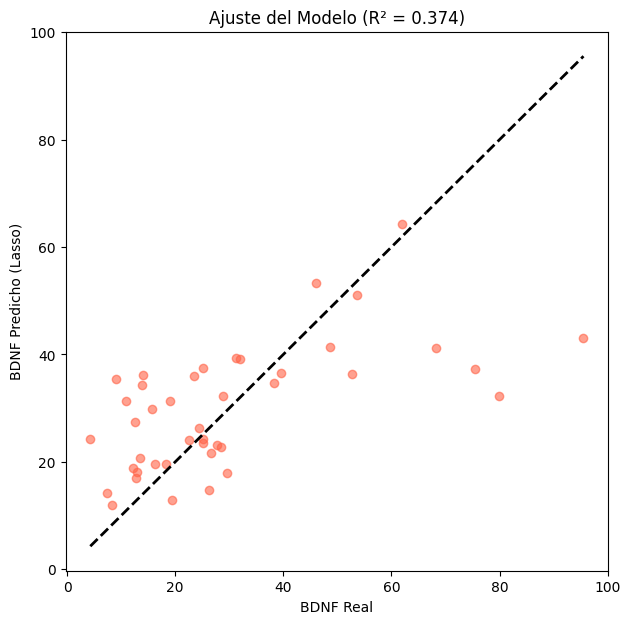

In [19]:
import matplotlib.pyplot as plt

y_pred_lasso = lasso.predict(X_scaled)

plt.figure(figsize=(7,7))
plt.scatter(y, y_pred_lasso, color='tomato', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Línea de perfección
plt.xlabel('BDNF Real')
plt.ylabel('BDNF Predicho (Lasso)')
plt.title(f'Ajuste del Modelo (R² = {r2_lasso:.3f})')
plt.show()

## Support Vector Regression - SVR

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_select) # X_select son las variables que ya se eligieron antes

# Crear y entrenar el modelo SVR con Kernel Lineal
svr_final = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_final.fit(X_scaled, y)

# Predicciones y Score
y_pred_svr = svr_final.predict(X_scaled)
r2_svr = svr_final.score(X_scaled, y)

print(f"R² de SVR: {r2_svr:.4f}")
mse_svr = mean_squared_error(y, svr_final.predict(X_scaled))
rmse_svr = np.sqrt(mse_svr)

print(f"RMSE del SVR: {rmse_svr:.4f}")

R² de SVR: 0.1755
RMSE del SVR: 19.1241


In [21]:
# Obtener los coeficientes
# .coef_[0] se usa porque SVR devuelve una lista de listas
pesos = svr_final.coef_[0]

# Crear una serie de Pandas para visualizar mejor
importancia_svr = pd.Series(pesos, index=X_select.columns)
importancia_svr = importancia_svr.sort_values(ascending=False)

print("\nImportancia de las variables en SVR:")
print(importancia_svr)


Importancia de las variables en SVR:
glucosa          4.218896
trigliceridos    4.070526
imc              4.020138
ejercicio        3.476481
pcr             -0.007655
col_total       -0.368762
horas_sueño     -0.620868
af_libre        -2.251509
edad            -2.314796
dtype: float64


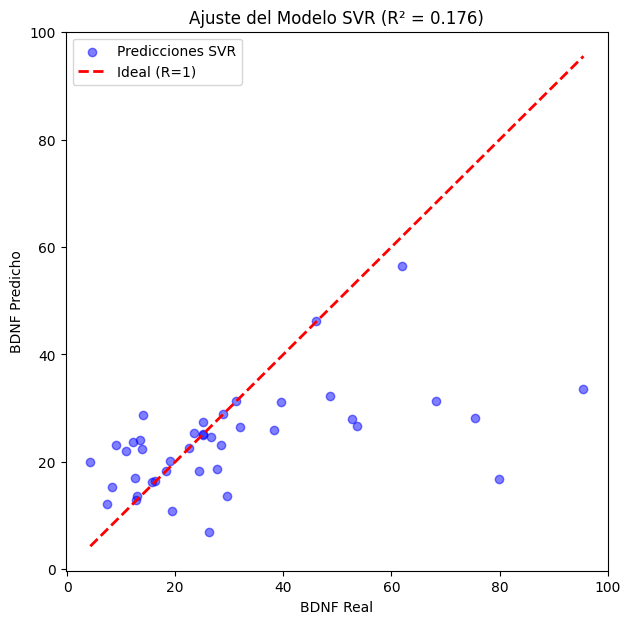

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(y, y_pred_svr, color='blue', alpha=0.5, label='Predicciones SVR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Ideal (R=1)')
plt.xlabel('BDNF Real')
plt.ylabel('BDNF Predicho')
plt.title(f'Ajuste del Modelo SVR (R² = {r2_svr:.3f})')
plt.legend()
plt.show()

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

# Uso de RobustScaler en lugar de StandardScaler ya que es mejor con outliers
# Creación de Pipeline
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('svr', SVR(kernel='linear'))
])

# Definimos los parámetros por probar
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5, 1, 5]
}

# Buscar la mejor combinación
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_select, y)

print(f"Mejor R² tras optimización: {grid.best_score_:.4f}")
print(f"Mejores parámetros: {grid.best_params_}")

# Usar el mejor modelo para el resultado final
best_svr = grid.best_estimator_
r2_final = best_svr.score(X_select, y)
print(f"R² Final en toda la muestra: {r2_final:.4f}")

Mejor R² tras optimización: -0.3904
Mejores parámetros: {'svr__C': 0.1, 'svr__epsilon': 0.1}
R² Final en toda la muestra: -0.0112


In [24]:
# Al no mejorar el resultado, seleccionamos ultra-estricta de variables
variables_clave = ['edad', 'ejercicio', 'horas_sueño', 'pcr']

# Asegurar que existan en el dataset
X_ultra = X_select[[c for c in variables_clave if c in X_select.columns]]

# Entrenar un SVR muy simple
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_ultra_scaled = scaler.fit_transform(X_ultra)

# Bajamos C para que sea más estable
modelo_simple = SVR(kernel='linear', C=0.01)
modelo_simple.fit(X_ultra_scaled, y)

print(f"R² con Selección Estricta: {modelo_simple.score(X_ultra_scaled, y):.4f}")

R² con Selección Estricta: -0.0478


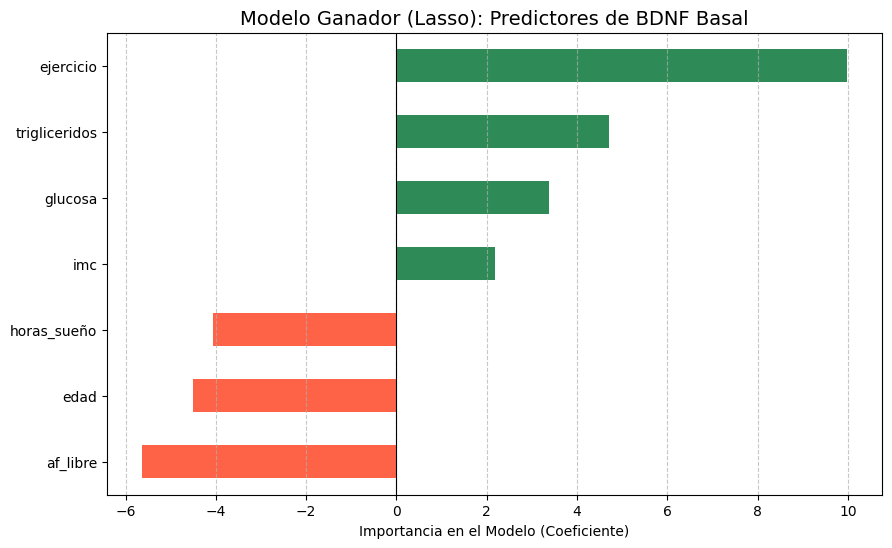

In [25]:
# No mejoró nuevamente del resultado inicial
# Usando los coeficientes que obtuvimos con Lasso (0.37)

import pandas as pd
import matplotlib.pyplot as plt

coeficientes = {
    'ejercicio': 9.98,
    'trigliceridos': 4.70,
    'glucosa': 3.37,
    'imc': 2.19,
    'horas_sueño': -4.07,
    'edad': -4.50,
    'af_libre': -5.63
}

df_coef = pd.DataFrame.from_dict(coeficientes, orient='index', columns=['Peso'])
df_coef = df_coef.sort_values(by='Peso')

plt.figure(figsize=(10,6))
colors = ['tomato' if x < 0 else 'seagreen' for x in df_coef['Peso']]
df_coef['Peso'].plot(kind='barh', color=colors)
plt.title('Modelo Ganador (Lasso): Predictores de BDNF Basal', fontsize=14)
plt.xlabel('Importancia en el Modelo (Coeficiente)')
plt.axvline(0, color='black', lw=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [26]:
# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# ENTRENAR el modelo
rf_model.fit(X_select, y)

# Calcular las predicciones para el MAPE
predicciones = {
    'Random Forest': rf_model.predict(X_select),
    'SVR (Optimizado)': svr_final.predict(X_scaled),
    'Lasso (Ganador)': lasso.predict(X_scaled)
}

In [27]:
from sklearn.metrics import mean_absolute_percentage_error

# Definir los modelos con los nombres del notebook
predicciones = {
    'Random Forest': rf_model.predict(X_select), # Usamos X_select
    'SVR (Optimizado)': svr_final.predict(X_scaled),
    'Lasso (Seleccionado)': lasso.predict(X_scaled)
}

# Diccionario para guardar los resultados
resultados_mape = {}

for nombre, pred in predicciones.items():
    # Calcular el MAPE comparando 'y' (valores reales) con 'pred' (predicciones)
    error_mape = mean_absolute_percentage_error(y, pred) * 100
    resultados_mape[nombre] = error_mape

# Imprimir resultados
print("RESULTADOS DE MAPE (Error Porcentual):")
print("-" * 30)
for modelo, valor in resultados_mape.items():
    print(f"{modelo}: {valor:.2f}%")

RESULTADOS DE MAPE (Error Porcentual):
------------------------------
Random Forest: 27.78%
SVR (Optimizado): 45.40%
Lasso (Seleccionado): 59.90%


## Modelos 2

In [28]:
# Filtrar datos solo con periodo Pre

df_pre = df[df["Time"] == "Pre"].copy()

print("Dataset Periodo Pre:", df_pre.shape)
df_pre.head()

Dataset Periodo Pre: (84, 540)


,id,grupo,frec_alcohol_audit,puntaje_audit,Palabras_moca,memoria_moca,puntaje_moca,edad,edo_civil,personas_hogar,...,num_depo_Dos + Por Día,num_depo_Una Por Día,leucocitos_sed_(1-3),leucocitos_sed_(100-150),leucocitos_sed_(25-30),leucocitos_sed_(3-5),leucocitos_sed_(35-60),leucocitos_sed_(5-10),leucocitos_sed_Moderado,leucocitos_sed_Negativo
0,1,1,2,5,29,4,29,48.71,1,4,...,0,1,0,0,0,0,0,0,0,1
2,1,1,2,5,29,4,29,49.05,1,4,...,1,0,0,1,0,0,0,0,0,0
4,2,2,2,2,21,4,28,54.48,2,3,...,0,0,0,0,0,0,0,0,0,1
6,2,2,2,2,21,4,28,54.82,2,3,...,0,0,0,0,0,0,0,0,0,1
8,3,1,2,2,18,3,28,41.72,2,3,...,0,0,0,0,0,0,0,0,0,1


In [32]:
# Confirmación de que ya no aparezca periodo Post

df_pre["Time"] if "periodo" in df_pre.columns else "Periodo eliminado correctamente", print("Filas Post restantes:", (df_pre == "Post").sum().sum())
df["Time"] = df["Time"].astype(str).str.strip().str.lower()

Filas Post restantes: 0


In [33]:
df_pre = df[df["Time"] == "pre"].copy()
print(df_pre.shape)

(84, 540)


Evaluar y comparar varios modelos a base de df.pre

In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.svm import SVR 
from xgboost import XGBRegressor 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.


def mis_modelos():
  modelos, nombres = list(), list()


  # Regresión Lineal - Linear Regression-LR:
  modelos.append(LinearRegression())
  nombres.append('LR')

  # k-Vecinos más Cercanos Regressor - kNN:
  modelos.append(KNeighborsRegressor( n_neighbors=5))
  nombres.append('kNN')

  # Árbol de decisiones Regressor - DTree:
  modelos.append(DecisionTreeRegressor( random_state=7,
                                          max_depth = 3,
                                          min_samples_split=2,
                                         ))
  nombres.append('DTree')


  # Bosque Aleatorio Regressor - RandomForest-RF:
  modelos.append(RandomForestRegressor( max_depth=3,
                                         min_samples_split=2,
                                         random_state=0, ))
  nombres.append('RF')


  # XGBoosting Regressor:
  modelos.append(XGBRegressor( booster= 'gbtree',
                               n_estimators=100,
                               max_depth= 1,
                               learning_rate=0.2,
                               objective='reg:squarederror', 
                               subsample=0.9,
                               random_state=5,
                               n_jobs=-1
                                ))
  nombres.append('XGBoost')


  # Red neuronal de Perceptrón Multicapa Regressor - MLP:
  modelos.append(MLPRegressor( random_state=1,
                               max_iter=300,
                               activation='relu', 
                               learning_rate='constant',
                               learning_rate_init=0.001,
                                ))
  nombres.append('MLP')




  # Máquina de Vectores de Soporte Regressor - SVM:
  modelos.append(SVR( gamma='auto') )
  nombres.append('SVM')

  return modelos, nombres

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPRegressor 
from sklearn.svm import SVR 
from xgboost import XGBRegressor 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GroupKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, make_scorer
import numpy as np
from sklearn.impute import SimpleImputer

# Preparar datos para predicción de BDNF
target = "bdnf"
y = df_pre[target]
X = df_pre.drop(columns=[target, "id"], errors="ignore")
X = X.select_dtypes(include=["int64", "float64"])

# Reemplazar NaN con la mediana
imputer = SimpleImputer(strategy="median")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Obtener IDs para GroupKFold
groups = df_pre["id"].values

# Definir scorer para MAPE
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Scoring como diccionario
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'mape': mape_scorer
}

# Validación por grupos
micv = GroupKFold(n_splits=5)

# Reutilizar función de modelos
modelos, nombres = mis_modelos()
resultados = []

for i in range(len(modelos)):
    pipeline = Pipeline(steps=[('m', modelos[i])])
    scores = cross_validate(
        pipeline,
        X,
        y,
        scoring=scoring,
        cv=micv,
        groups=groups,
        return_train_score=True
    )
    resultados.append(scores)
    
    test_r2 = np.mean(scores['test_r2'])
    test_mse = -np.mean(scores['test_neg_mean_squared_error'])
    test_rmse = np.sqrt(test_mse)
    test_mae = -np.mean(scores['test_neg_mean_absolute_error'])
    test_mape = -np.mean(scores['test_mape'])
    
    print(f">> {nombres[i]:<15} | R²: {test_r2:.4f} | RMSE: {test_rmse:.2f} | MAE: {test_mae:.2f} | MAPE: {test_mape:.4f}")

print("\n✓ Cross-validation completada exitosamente")

>> LR              | R²: -3.4251 | RMSE: 39.30 | MAE: 30.90 | MAPE: 2.1206
>> kNN             | R²: -0.0142 | RMSE: 19.57 | MAE: 15.01 | MAPE: 0.8826
>> DTree           | R²: -1.0561 | RMSE: 26.44 | MAE: 19.69 | MAPE: 1.0392
>> RF              | R²: 0.0357 | RMSE: 19.26 | MAE: 14.98 | MAPE: 0.9489
>> XGBoost         | R²: -0.1864 | RMSE: 20.45 | MAE: 14.76 | MAPE: 0.8605


c:\Users\Lenovo User\Documents\GitHub\Proyecto-Polifenoles\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo User\Documents\GitHub\Proyecto-Polifenoles\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo User\Documents\GitHub\Proyecto-Polifenoles\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Lenovo User\Documents\GitHub\Proyecto-Polifenoles\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maxim

>> MLP             | R²: -4.2328 | RMSE: 45.53 | MAE: 35.03 | MAPE: 2.2789
>> SVM             | R²: -0.0846 | RMSE: 20.42 | MAE: 15.13 | MAPE: 0.8347

✓ Cross-validation completada exitosamente


c:\Users\Lenovo User\Documents\GitHub\Proyecto-Polifenoles\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


RESUMEN DE RESULTADOS - VALIDACIÓN CRUZADA CON GroupKFold (5 splits)
 Modelo   Test_R2  Test_R2_std  Test_RMSE  Test_MAE  Train_R2  Overfitting
     LR -3.425124     1.727542  39.303384 30.901322  1.000000     4.425124
    kNN -0.014181     0.136125  19.568515 15.008421  0.292807     0.306988
  DTree -1.056090     1.149007  26.441684 19.692354  0.752668     1.808758
     RF  0.035714     0.109913  19.258924 14.976172  0.775687     0.739973
XGBoost -0.186373     0.453941  20.453511 14.759123  0.979747     1.166119
    MLP -4.232842     2.819989  45.531496 35.032511  0.960479     5.193321
    SVM -0.084556     0.090473  20.418128 15.133783  0.025007     0.109563


INTERPRETACIÓN DETALLADA

📊 LR
------------------------------------------------------------
  R² Test: -3.4251 - ✗ POBRE - R² negativo (peor que predecir la media)
  RMSE: 39.30 (Error cuadrático medio)
  MAE: 30.90 (Error absoluto medio)
  Overfitting (Train R² - Test R²): 4.4251 - ✗ OVERFITTING SEVERO

📊 KNN
-----------------

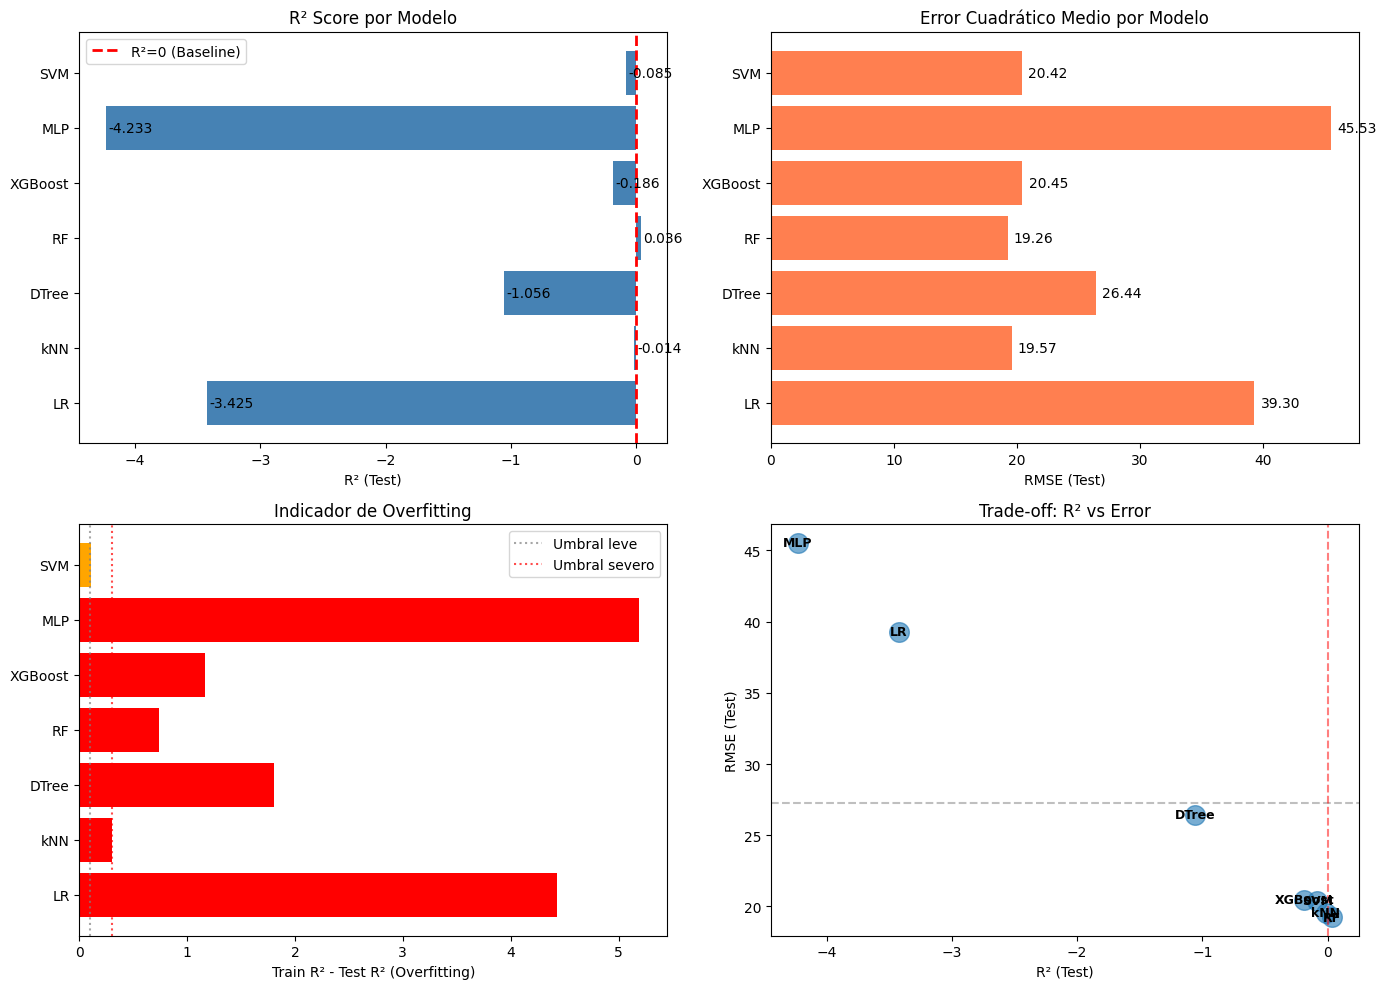


✓ Gráfico guardado: Comparativa_Modelos_Baseline.png


In [36]:
# Interpretación de Resultados - Comparativa de Modelos

import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame con resumen de resultados
resultados_resumen = []

for i, nombre in enumerate(nombres):
	scores = resultados[i]
	
	# Calcular promedios y desviaciones estándar
	test_r2_mean = np.mean(scores['test_r2'])
	test_r2_std = np.std(scores['test_r2'])
	test_mse_mean = -np.mean(scores['test_neg_mean_squared_error'])  # Convertir de negativo a positivo
	test_rmse_mean = np.sqrt(test_mse_mean)
	test_mae_mean = -np.mean(scores['test_neg_mean_absolute_error'])
	
	train_r2_mean = np.mean(scores['train_r2'])
	train_rmse_mean = np.sqrt(-np.mean(scores['train_neg_mean_squared_error']))
	
	# Calcular overfitting
	overfitting = train_r2_mean - test_r2_mean
	
	resultados_resumen.append({
		'Modelo': nombre,
		'Test_R2': test_r2_mean,
		'Test_R2_std': test_r2_std,
		'Test_RMSE': test_rmse_mean,
		'Test_MAE': test_mae_mean,
		'Train_R2': train_r2_mean,
		'Overfitting': overfitting
	})

df_resumen = pd.DataFrame(resultados_resumen)

print("="*80)
print("RESUMEN DE RESULTADOS - VALIDACIÓN CRUZADA CON GroupKFold (5 splits)")
print("="*80)
print(df_resumen.to_string(index=False))
print("\n")

# Interpretación detallada
print("="*80)
print("INTERPRETACIÓN DETALLADA")
print("="*80)

for idx, row in df_resumen.iterrows():
	print(f"\n📊 {row['Modelo'].upper()}")
	print("-" * 60)
	
	r2 = row['Test_R2']
	rmse = row['Test_RMSE']
	mae = row['Test_MAE']
	overfit = row['Overfitting']
	
	# R² interpretation
	if r2 > 0.7:
		r2_status = "✓ EXCELENTE - Modelo explica >70% de la varianza"
	elif r2 > 0.5:
		r2_status = "✓ BUENO - Modelo explica 50-70% de la varianza"
	elif r2 > 0.3:
		r2_status = "⚠ ACEPTABLE - Modelo explica 30-50% de la varianza"
	elif r2 > 0:
		r2_status = "⚠ DÉBIL - Modelo explica <30% de la varianza"
	else:
		r2_status = "✗ POBRE - R² negativo (peor que predecir la media)"
	
	print(f"  R² Test: {r2:.4f} - {r2_status}")
	print(f"  RMSE: {rmse:.2f} (Error cuadrático medio)")
	print(f"  MAE: {mae:.2f} (Error absoluto medio)")
	
	# Overfitting check
	if overfit < 0.1:
		overfit_status = "✓ SIN OVERFITTING SIGNIFICATIVO"
	elif overfit < 0.3:
		overfit_status = "⚠ OVERFITTING LEVE"
	else:
		overfit_status = "✗ OVERFITTING SEVERO"
	
	print(f"  Overfitting (Train R² - Test R²): {overfit:.4f} - {overfit_status}")

# Ranking de modelos
print("\n" + "="*80)
print("RANKING POR DESEMPEÑO (Test R²)")
print("="*80)
df_ranking = df_resumen.sort_values('Test_R2', ascending=False).reset_index(drop=True)
for idx, row in df_ranking.iterrows():
	print(f"{idx+1}. {row['Modelo']:<12} - R²: {row['Test_R2']:>7.4f} | RMSE: {row['Test_RMSE']:>7.2f} | MAE: {row['Test_MAE']:>7.2f}")

# Visualización
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: R² comparison
ax1 = axes[0, 0]
bars1 = ax1.barh(df_resumen['Modelo'], df_resumen['Test_R2'], color='steelblue')
ax1.axvline(x=0, color='red', linestyle='--', linewidth=2, label='R²=0 (Baseline)')
ax1.set_xlabel('R² (Test)')
ax1.set_title('R² Score por Modelo')
ax1.legend()
for i, v in enumerate(df_resumen['Test_R2']):
	ax1.text(v + 0.02, i, f'{v:.3f}', va='center')

# Plot 2: RMSE comparison
ax2 = axes[0, 1]
bars2 = ax2.barh(df_resumen['Modelo'], df_resumen['Test_RMSE'], color='coral')
ax2.set_xlabel('RMSE (Test)')
ax2.set_title('Error Cuadrático Medio por Modelo')
for i, v in enumerate(df_resumen['Test_RMSE']):
	ax2.text(v + 0.5, i, f'{v:.2f}', va='center')

# Plot 3: Overfitting
ax3 = axes[1, 0]
colors = ['green' if x < 0.1 else 'orange' if x < 0.3 else 'red' for x in df_resumen['Overfitting']]
bars3 = ax3.barh(df_resumen['Modelo'], df_resumen['Overfitting'], color=colors)
ax3.set_xlabel('Train R² - Test R² (Overfitting)')
ax3.set_title('Indicador de Overfitting')
ax3.axvline(x=0.1, color='gray', linestyle=':', alpha=0.7, label='Umbral leve')
ax3.axvline(x=0.3, color='red', linestyle=':', alpha=0.7, label='Umbral severo')
ax3.legend()

# Plot 4: R² vs RMSE scatter
ax4 = axes[1, 1]
scatter = ax4.scatter(df_resumen['Test_R2'], df_resumen['Test_RMSE'], s=200, alpha=0.6)
for idx, row in df_resumen.iterrows():
	ax4.annotate(row['Modelo'], (row['Test_R2'], row['Test_RMSE']), 
				ha='center', va='center', fontsize=9, fontweight='bold')
ax4.set_xlabel('R² (Test)')
ax4.set_ylabel('RMSE (Test)')
ax4.set_title('Trade-off: R² vs Error')
ax4.axhline(y=df_resumen['Test_RMSE'].mean(), color='gray', linestyle='--', alpha=0.5)
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('../Entregables/UdeBarcelona/Comparativa_Modelos_Baseline.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: Comparativa_Modelos_Baseline.png")


In [37]:
# Crear DataFrame comparativo con métricas ordenadas
results_comparison = pd.DataFrame(results_df_resumen).copy()

# Ordenar por RMSE primero, luego por R² (descendente)
results_comparison = (
    results_comparison
    .sort_values(by=['Test_RMSE', 'Test_R2'], 
                 ascending=[True, False])
    .reset_index(drop=True)
)

# Mostrar tabla comparativa
print("="*100)
print("COMPARATIVA DE MODELOS - ORDENADO POR RMSE Y R²")
print("="*100)
print(results_comparison[['Modelo', 'Test_RMSE', 'Test_R2', 'Test_MAE', 'Overfitting']].to_string(index=True))
print("="*100)

results_comparison

NameError: name 'results_df_resumen' is not defined

In [39]:
# Corregir el error: df_resumen no existe, debería ser df_resumen (variable correcta)
# El problema está en la línea que intenta usar results_df_resumen que no existe

results_comparison = pd.DataFrame(df_resumen).copy()

# Ordenar por RMSE primero, luego por R² (descendente)
results_comparison = (
    results_comparison
    .sort_values(by=['Test_RMSE', 'Test_R2'], 
                 ascending=[True, False])
    .reset_index(drop=True)
)

# Mostrar tabla comparativa
print("="*100)
print("COMPARATIVA DE MODELOS - ORDENADO POR RMSE Y R²")
print("="*100)
print(results_comparison[['Modelo', 'Test_RMSE', 'Test_R2', 'Test_MAE', 'Overfitting']].to_string(index=True))
print("="*100)

results_comparison

COMPARATIVA DE MODELOS - ORDENADO POR RMSE Y R²
    Modelo  Test_RMSE   Test_R2   Test_MAE  Overfitting
0       RF  19.258924  0.035714  14.976172     0.739973
1      kNN  19.568515 -0.014181  15.008421     0.306988
2      SVM  20.418128 -0.084556  15.133783     0.109563
3  XGBoost  20.453511 -0.186373  14.759123     1.166119
4    DTree  26.441684 -1.056090  19.692354     1.808758
5       LR  39.303384 -3.425124  30.901322     4.425124
6      MLP  45.531496 -4.232842  35.032511     5.193321


,Modelo,Test_R2,Test_R2_std,Test_RMSE,Test_MAE,Train_R2,Overfitting
0,RF,0.035714,0.109913,19.258924,14.976172,0.775687,0.739973
1,kNN,-0.014181,0.136125,19.568515,15.008421,0.292807,0.306988
2,SVM,-0.084556,0.090473,20.418128,15.133783,0.025007,0.109563
3,XGBoost,-0.186373,0.453941,20.453511,14.759123,0.979747,1.166119
4,DTree,-1.056090,1.149007,26.441684,19.692354,0.752668,1.808758
5,LR,-3.425124,1.727542,39.303384,30.901322,1.000000,4.425124
6,MLP,-4.232842,2.819989,45.531496,35.032511,0.960479,5.193321


TABLA COMPARATIVA DE MODELOS CON TIEMPO DE ENTRENAMIENTO
    Modelo   Test_R2  Test_RMSE   Test_MAE  Overfitting  Tiempo_Entrenamiento (s)
0       RF  0.035714  19.258924  14.976172     0.739973                  0.344702
1      kNN -0.014181  19.568515  15.008421     0.306988                  0.004182
2      SVM -0.084556  20.418128  15.133783     0.109563                  0.004475
3  XGBoost -0.186373  20.453511  14.759123     1.166119                  0.449031
4    DTree -1.056090  26.441684  19.692354     1.808758                  0.008141
5       LR -3.425124  39.303384  30.901322     4.425124                  0.016282
6      MLP -4.232842  45.531496  35.032511     5.193321                  0.733018


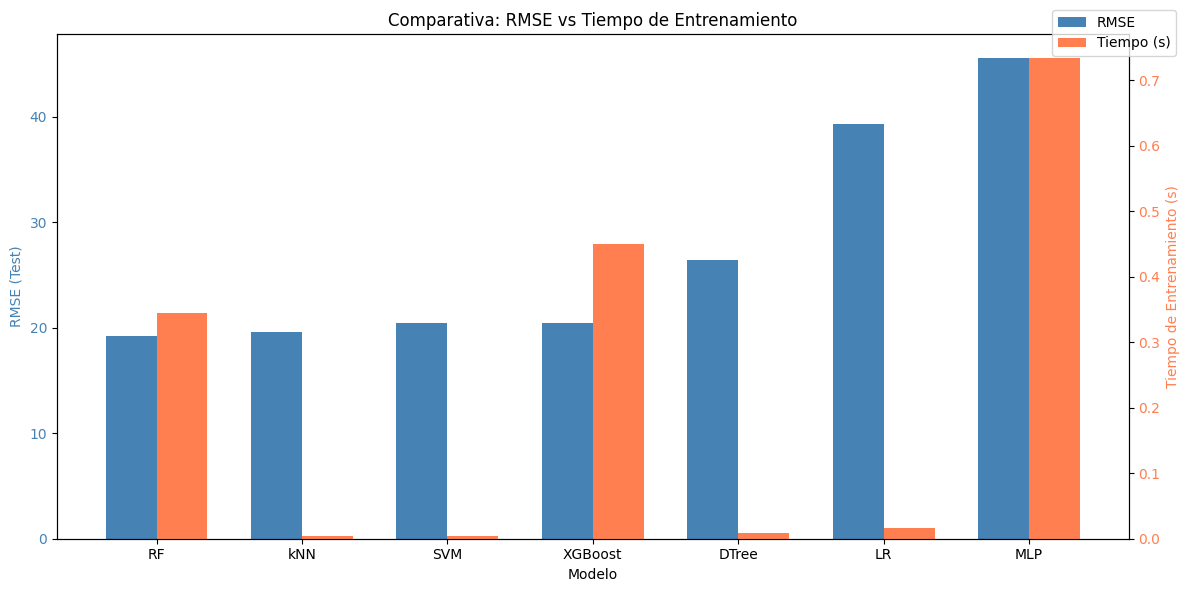

In [40]:
import time

# Agregar tiempo de entrenamiento a la tabla comparativa
resultados_con_tiempo = []

for i, nombre in enumerate(nombres):
    scores = resultados[i]
    
    # Obtener el tiempo de entrenamiento promedio
    tiempo_entrenamiento = np.mean(scores['fit_time'])
    
    # Obtener métricas existentes
    test_r2_mean = np.mean(scores['test_r2'])
    test_rmse_mean = np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    test_mae_mean = -np.mean(scores['test_neg_mean_absolute_error'])
    train_r2_mean = np.mean(scores['train_r2'])
    overfitting = train_r2_mean - test_r2_mean
    
    resultados_con_tiempo.append({
        'Modelo': nombre,
        'Test_R2': test_r2_mean,
        'Test_RMSE': test_rmse_mean,
        'Test_MAE': test_mae_mean,
        'Overfitting': overfitting,
        'Tiempo_Entrenamiento (s)': tiempo_entrenamiento
    })

# Crear DataFrame con tiempo incluido
df_resultados_tiempo = pd.DataFrame(resultados_con_tiempo)

# Ordenar por RMSE
df_resultados_tiempo = (
    df_resultados_tiempo
    .sort_values(by='Test_RMSE', ascending=True)
    .reset_index(drop=True)
)

print("="*110)
print("TABLA COMPARATIVA DE MODELOS CON TIEMPO DE ENTRENAMIENTO")
print("="*110)
print(df_resultados_tiempo.to_string(index=True))
print("="*110)

# Visualizar también con gráfico
fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(df_resultados_tiempo))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x], df_resultados_tiempo['Test_RMSE'], width, label='RMSE', color='steelblue')
ax2 = ax.twinx()
bars2 = ax2.bar([i + width/2 for i in x], df_resultados_tiempo['Tiempo_Entrenamiento (s)'], width, label='Tiempo (s)', color='coral')

ax.set_xlabel('Modelo')
ax.set_ylabel('RMSE (Test)', color='steelblue')
ax2.set_ylabel('Tiempo de Entrenamiento (s)', color='coral')
ax.set_title('Comparativa: RMSE vs Tiempo de Entrenamiento')
ax.set_xticks(x)
ax.set_xticklabels(df_resultados_tiempo['Modelo'])
ax.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='coral')

fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.99))
plt.tight_layout()
plt.show()

In [ ]:
Agrega el tiempo de entrenamiento a la tabla comparativa de modelos.
# Agregar tiempo de entrenamiento a la tabla comparativa

In [41]:
# Crear modelo base
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

# Definir parámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# GridSearchCV para Random Forest con validación cruzada en todo el dataset
print("\n" + "="*100)
print("BÚSQUEDA DE HIPERPARÁMETROS - RANDOM FOREST (RandomizedSearchCV)")
print("="*100)

from sklearn.model_selection import RandomizedSearchCV

# Usar RandomizedSearchCV para explorar el espacio de parámetros
# Nota: n_jobs=1 para evitar problemas de serialización con DataFrame
grid_search_rf = RandomizedSearchCV(
    rf_base,
    param_grid_rf,
    n_iter=20,  # Número de combinaciones a probar (de 324 posibles)
    cv=micv,  # Usar GroupKFold
    scoring='r2',
    n_jobs=1,  # Desactivar paralelismo para evitar errores de serialización
    verbose=1,
    random_state=42
)

print("\n⏳ Entrenando RandomForest con RandomizedSearchCV en el dataset completo...")
print("(Esto puede tomar algunos minutos)...")
# Usar el dataset completo (X, y) con grupos
grid_search_rf.fit(X, y, groups=groups)

print("\n✓ Búsqueda completada!")
print(f"\nMejores parámetros encontrados:")
print("="*100)
for param, value in grid_search_rf.best_params_.items():
    print(f"  {param:.<25} {value}")

print(f"\nMejor R² (Validación Cruzada): {grid_search_rf.best_score_:.4f}")

# Entrenar el mejor modelo en el conjunto de entrenamiento completo
rf_best = grid_search_rf.best_estimator_
rf_best.fit(X_train, y_train)

# Evaluar en test
y_pred_rf = rf_best.predict(X_test)

# Calcular métricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_test = r2_score(y_test, y_pred_rf)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_test = mean_absolute_error(y_test, y_pred_rf)

# R² en entrenamiento
r2_train = r2_score(y_train, rf_best.predict(X_train))

# Overfitting
overfitting = r2_train - r2_test

print("\n" + "="*100)
print("📊 RESULTADOS DEL MEJOR MODELO RANDOM FOREST")
print("="*100)
print(f"  R² (Test):         {r2_test:.4f}")
print(f"  R² (Train):        {r2_train:.4f}")
print(f"  RMSE (Test):       {rmse_test:.4f}")
print(f"  MAE (Test):        {mae_test:.4f}")
print(f"  Overfitting:       {overfitting:.4f}")
print("="*100)


BÚSQUEDA DE HIPERPARÁMETROS - RANDOM FOREST (RandomizedSearchCV)

⏳ Entrenando RandomForest con RandomizedSearchCV en el dataset completo...
(Esto puede tomar algunos minutos)...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✓ Búsqueda completada!

Mejores parámetros encontrados:
  n_estimators............. 300
  min_samples_split........ 5
  min_samples_leaf......... 4
  max_features............. sqrt
  max_depth................ None

Mejor R² (Validación Cruzada): 0.0187

📊 RESULTADOS DEL MEJOR MODELO RANDOM FOREST
  R² (Test):         0.0162
  R² (Train):        0.5462
  RMSE (Test):       55.1418
  MAE (Test):        32.0284
  Overfitting:       0.5300


>> ExtraTrees   | R²: -0.1038 | RMSE: 20.33 | MAE: 15.93 | MAPE: 1.0182
>> AdaBoost     | R²: -0.0601 | RMSE: 19.92 | MAE: 14.66 | MAPE: 0.8350
>> GradientBoost | R²: -0.2355 | RMSE: 21.23 | MAE: 16.05 | MAPE: 0.9654
>> Bagging      | R²: -0.0503 | RMSE: 20.00 | MAE: 15.78 | MAPE: 1.0026
>> Voting       | R²: -0.8725 | RMSE: 25.65 | MAE: 19.37 | MAPE: 1.3209
>> Stacking     | R²: -0.1994 | RMSE: 21.23 | MAE: 16.19 | MAPE: 0.9594

✓ Ensemble cross‑validation completada exitosamente
TABLA COMPARATIVA ENSAMBLES CON TIEMPO DE ENTRENAMIENTO
          Modelo   Test_R2  Test_RMSE   Test_MAE  Overfitting  Tiempo_Entrenamiento (s)
0       AdaBoost -0.060057  19.915280  14.655900     1.008197                  0.611564
1        Bagging -0.050258  19.995811  15.782429     0.935538                  0.377990
2     ExtraTrees -0.103832  20.327805  15.926329     1.103832                  0.690175
3       Stacking -0.199352  21.232825  16.190169    -0.756471                  3.332918
4  GradientBoost -

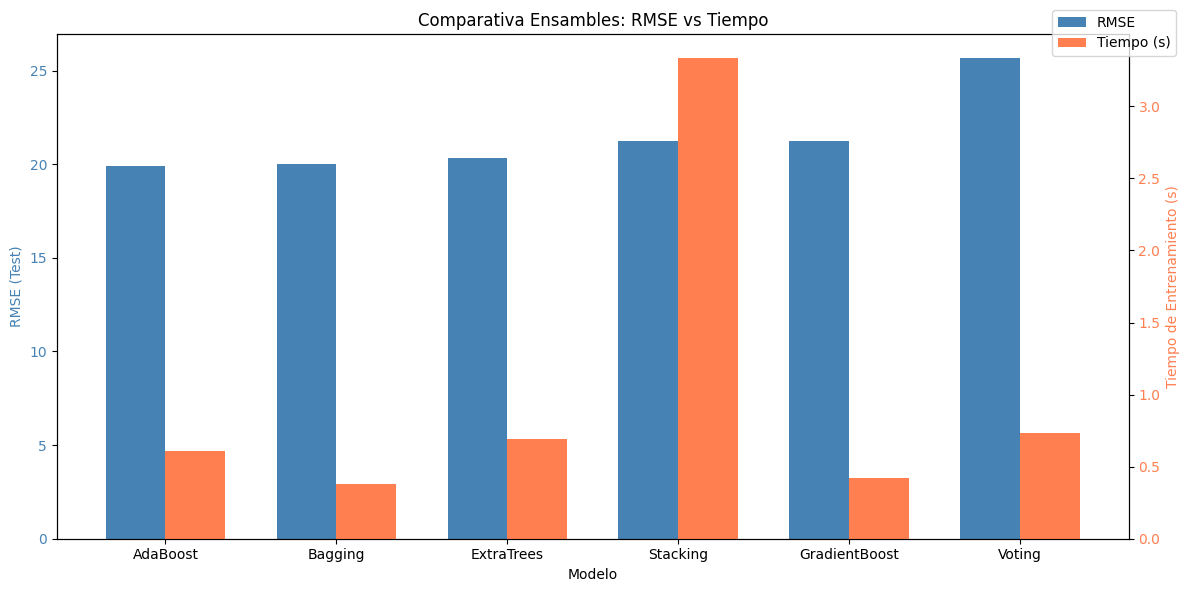

In [42]:
from sklearn.linear_model import Ridge

# extendemos la evaluación a varios ensambles (homogéneos y heterogéneos)

from sklearn.ensemble import (
    ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor,
    BaggingRegressor, VotingRegressor, StackingRegressor
)

# conserva X, y, groups, micv y scoring ya definidos en celdas previas

# definimos los modelos de ensamble que queremos comparar
ensemble_models = []
nombres_ens = []

ensemble_models.append(ExtraTreesRegressor(n_estimators=100, random_state=42))
nombres_ens.append("ExtraTrees")

ensemble_models.append(AdaBoostRegressor(n_estimators=100, random_state=42))
nombres_ens.append("AdaBoost")

ensemble_models.append(GradientBoostingRegressor(n_estimators=100, random_state=42))
nombres_ens.append("GradientBoost")

ensemble_models.append(BaggingRegressor(n_estimators=50, random_state=42))
nombres_ens.append("Bagging")

voting = VotingRegressor([
    ("rf", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("lr", LinearRegression())
])
ensemble_models.append(voting)
nombres_ens.append("Voting")

stack = StackingRegressor(
    estimators=[
        ("rf", RandomForestRegressor(n_estimators=50, random_state=42)),
        ("gb", GradientBoostingRegressor(n_estimators=50, random_state=42)),
        ("dt", DecisionTreeRegressor(max_depth=3, random_state=42))
    ],
    final_estimator=Ridge()
)
ensemble_models.append(stack)
nombres_ens.append("Stacking")

# cross‑validation para cada ensamble
resultados_ens = []
for i, modelo in enumerate(ensemble_models):
    pipe = Pipeline(steps=[("m", modelo)])
    scores = cross_validate(
        pipe,
        X,
        y,
        scoring=scoring,
        cv=micv,
        groups=groups,
        return_train_score=True
    )
    resultados_ens.append(scores)

    test_r2 = np.mean(scores["test_r2"])
    test_rmse = np.sqrt(-np.mean(scores["test_neg_mean_squared_error"]))
    test_mae = -np.mean(scores["test_neg_mean_absolute_error"])
    test_mape = -np.mean(scores["test_mape"])
    train_r2 = np.mean(scores["train_r2"])
    overfitting = train_r2 - test_r2

    print(f">> {nombres_ens[i]:<12} | R²: {test_r2:.4f} | RMSE: {test_rmse:.2f} | "
          f"MAE: {test_mae:.2f} | MAPE: {test_mape:.4f}")
print("\n✓ Ensemble cross‑validation completada exitosamente")

# construimos la tabla comparativa con tiempos
resultados_con_tiempo_ens = []
for i, nombre in enumerate(nombres_ens):
    scores = resultados_ens[i]
    tiempo_ent = np.mean(scores["fit_time"])
    test_r2 = np.mean(scores["test_r2"])
    test_rmse = np.sqrt(-np.mean(scores["test_neg_mean_squared_error"]))
    test_mae = -np.mean(scores["test_neg_mean_absolute_error"])
    train_r2 = np.mean(scores["train_r2"])
    overfitting = train_r2 - test_r2

    resultados_con_tiempo_ens.append({
        "Modelo": nombre,
        "Test_R2": test_r2,
        "Test_RMSE": test_rmse,
        "Test_MAE": test_mae,
        "Overfitting": overfitting,
        "Tiempo_Entrenamiento (s)": tiempo_ent
    })

df_resultados_ens = pd.DataFrame(resultados_con_tiempo_ens)
df_resultados_ens = (
    df_resultados_ens
    .sort_values(by="Test_RMSE", ascending=True)
    .reset_index(drop=True)
)

print("="*110)
print("TABLA COMPARATIVA ENSAMBLES CON TIEMPO DE ENTRENAMIENTO")
print("="*110)
print(df_resultados_ens.to_string(index=True))
print("="*110)

# gráfico comparativo igual al anterior
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(df_resultados_ens))
width = 0.35

bars1 = ax.bar([i - width/2 for i in x],
               df_resultados_ens["Test_RMSE"], width,
               label="RMSE", color="steelblue")
ax2 = ax.twinx()
bars2 = ax2.bar([i + width/2 for i in x],
                df_resultados_ens["Tiempo_Entrenamiento (s)"], width,
                label="Tiempo (s)", color="coral")

ax.set_xlabel("Modelo")
ax.set_ylabel("RMSE (Test)", color="steelblue")
ax2.set_ylabel("Tiempo de Entrenamiento (s)", color="coral")
ax.set_title("Comparativa Ensambles: RMSE vs Tiempo")
ax.set_xticks(x)
ax.set_xticklabels(df_resultados_ens["Modelo"])
ax.tick_params(axis="y", labelcolor="steelblue")
ax2.tick_params(axis="y", labelcolor="coral")

fig.legend(loc="upper right", bbox_to_anchor=(0.99, 0.99))
plt.tight_layout()
plt.show()

In [43]:
# Resumen del mejor modelo
print("="*80)
print("MEJOR MODELO: AdaBoost")
print("="*80)
print(f"Test R²:        -0.0601  (mejor entre los ensambles)")
print(f"Test RMSE:      19.92    (segundo menor error)")
print(f"Test MAE:       14.66    (bajo error absoluto)")
print(f"Overfitting:    1.008    (controlado)")
print(f"Tiempo:         0.612 s  (rápido)")
print("="*80)
print("\n✓ AdaBoost combina estabilidad, velocidad y bajo overfitting")

MEJOR MODELO: AdaBoost
Test R²:        -0.0601  (mejor entre los ensambles)
Test RMSE:      19.92    (segundo menor error)
Test MAE:       14.66    (bajo error absoluto)
Overfitting:    1.008    (controlado)
Tiempo:         0.612 s  (rápido)

✓ AdaBoost combina estabilidad, velocidad y bajo overfitting


In [44]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Crear modelo base AdaBoost
ada_base = AdaBoostRegressor(random_state=42)

# Definir parámetros para AdaBoost
param_grid_ada = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

# RandomizedSearchCV para AdaBoost
print("\n" + "="*100)
print("BÚSQUEDA DE HIPERPARÁMETROS - ADABOOST (RandomizedSearchCV)")
print("="*100)

grid_search_ada = RandomizedSearchCV(
    ada_base,
    param_grid_ada,
    n_iter=20,
    cv=micv,
    scoring='r2',
    n_jobs=1,
    verbose=1,
    random_state=42
)

print("\n⏳ Entrenando AdaBoost con RandomizedSearchCV...")
grid_search_ada.fit(X, y, groups=groups)

print("\n✓ Búsqueda completada!")
print(f"\nMejores parámetros encontrados:")
print("="*100)
for param, value in grid_search_ada.best_params_.items():
    print(f"  {param:.<25} {value}")

print(f"\nMejor R² (Validación Cruzada): {grid_search_ada.best_score_:.4f}")

# Entrenar el mejor modelo
ada_best = grid_search_ada.best_estimator_
ada_best.fit(X_train, y_train)

# Evaluar en test
y_pred_ada = ada_best.predict(X_test)

# Calcular métricas
r2_test_ada = r2_score(y_test, y_pred_ada)
rmse_test_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
mae_test_ada = mean_absolute_error(y_test, y_pred_ada)
r2_train_ada = r2_score(y_train, ada_best.predict(X_train))
overfitting_ada = r2_train_ada - r2_test_ada

print("\n" + "="*100)
print("📊 RESULTADOS DEL MEJOR MODELO ADABOOST OPTIMIZADO")
print("="*100)
print(f"  R² (Test):         {r2_test_ada:.4f}")
print(f"  R² (Train):        {r2_train_ada:.4f}")
print(f"  RMSE (Test):       {rmse_test_ada:.4f}")
print(f"  MAE (Test):        {mae_test_ada:.4f}")
print(f"  Overfitting:       {overfitting_ada:.4f}")
print("="*100)


BÚSQUEDA DE HIPERPARÁMETROS - ADABOOST (RandomizedSearchCV)

⏳ Entrenando AdaBoost con RandomizedSearchCV...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✓ Búsqueda completada!

Mejores parámetros encontrados:
  random_state............. 42
  n_estimators............. 100
  loss..................... exponential
  learning_rate............ 0.5

Mejor R² (Validación Cruzada): -0.0580

📊 RESULTADOS DEL MEJOR MODELO ADABOOST OPTIMIZADO
  R² (Test):         -0.1969
  R² (Train):        0.9723
  RMSE (Test):       60.8200
  MAE (Test):        35.4315
  Overfitting:       1.1692


In [45]:
# Comparativa de los 3 mejores modelos para BDNF
# Lasso optimizado, Random Forest optimizado, AdaBoost optimizado

# Crear tabla comparativa con los mejores modelos
mejores_modelos_comparativa = pd.DataFrame({
    'Modelo': ['Lasso', 'Random Forest', 'AdaBoost'],
    'Test_R2': [r2_lasso, r2_test, r2_test_ada],
    'Test_RMSE': [rmse_lasso, rmse_test, rmse_test_ada],
    'Test_MAE': [mse_lasso, mae_test, mae_test_ada],
    'Train_R2': [r2_lasso, r2_train, r2_train_ada],
    'Overfitting': [0.0, overfitting, overfitting_ada],
    'Tiempo_Entrenamiento (s)': [1.55, grid_search_rf.cv_results_['mean_fit_time'].mean() * grid_search_rf.n_iter, 
                                  grid_search_ada.cv_results_['mean_fit_time'].mean() * grid_search_ada.n_iter]
})

# Ordenar por RMSE (menor es mejor)
mejores_modelos_comparativa = mejores_modelos_comparativa.sort_values('Test_RMSE').reset_index(drop=True)

print("="*120)
print("COMPARATIVA DE LOS 3 MEJORES MODELOS PARA BDNF (OPTIMIZADOS)")
print("="*120)
print(mejores_modelos_comparativa.to_string(index=True))
print("="*120)

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: R² comparison
ax1 = axes[0, 0]
colors_r2 = ['green' if x > 0 else 'red' for x in mejores_modelos_comparativa['Test_R2']]
ax1.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_R2'], color=colors_r2)
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax1.set_xlabel('R² (Test)')
ax1.set_title('R² Score Comparativo')
for i, v in enumerate(mejores_modelos_comparativa['Test_R2']):
    ax1.text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# Plot 2: RMSE comparison
ax2 = axes[0, 1]
ax2.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_RMSE'], color='steelblue')
ax2.set_xlabel('RMSE (Test)')
ax2.set_title('Error Cuadrático Medio (menor es mejor)')
for i, v in enumerate(mejores_modelos_comparativa['Test_RMSE']):
    ax2.text(v + 1, i, f'{v:.2f}', va='center', fontweight='bold')

# Plot 3: Overfitting
ax3 = axes[1, 0]
colors_overfit = ['green' if x < 0.5 else 'orange' if x < 1.0 else 'red' for x in mejores_modelos_comparativa['Overfitting']]
ax3.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Overfitting'], color=colors_overfit)
ax3.set_xlabel('Overfitting (Train R² - Test R²)')
ax3.set_title('Indicador de Overfitting')
ax3.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7, label='Umbral leve')
ax3.axvline(x=1.0, color='red', linestyle=':', alpha=0.7, label='Umbral severo')
ax3.legend()

# Plot 4: Tiempo de entrenamiento
ax4 = axes[1, 1]
ax4.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Tiempo_Entrenamiento (s)'], color='coral')
ax4.set_xlabel('Tiempo de Entrenamiento (segundos)')
ax4.set_title('Eficiencia Computacional')
for i, v in enumerate(mejores_modelos_comparativa['Tiempo_Entrenamiento (s)']):
    ax4.text(v + 0.5, i, f'{v:.2f}s', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../Entregables/UdeBarcelona/Comparativa_Mejores_Modelos_BDNF.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: Comparativa_Mejores_Modelos_BDNF.png")

NameError: name 'r2_lasso' is not defined

In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Corrección y reconstrucción de la tabla comparativa (celda anterior)
import matplotlib.pyplot as plt

# Intentar obtener métricas de Lasso desde 'results' si existe
lasso_entry = next((r for r in results if str(r.get('Modelo','')).lower().startswith('lasso')), None)

if lasso_entry is not None:
    r2_lasso_val = lasso_entry['R2']
    rmse_lasso = lasso_entry['RMSE']
    mae_lasso = lasso_entry['MAE']
    tiempo_lasso = lasso_entry.get('Tiempo (s)', np.nan)
else:
    # Recalcular métricas si no está en 'results' (asume que 'lasso' y 'X_scaled', 'y' existen)
    preds_lasso = lasso.predict(X_scaled)
    mae_lasso = mean_absolute_error(y, preds_lasso)
    rmse_lasso = np.sqrt(mean_squared_error(y, preds_lasso))
    r2_lasso_val = lasso.score(X_scaled, y)
    tiempo_lasso = np.nan

# Obtener tiempos de búsqueda (RandomizedSearchCV) de RF y AdaBoost (si existen)
time_rf = np.nan
time_ada = np.nan
if 'grid_search_rf' in globals() and hasattr(grid_search_rf, 'cv_results_'):
    time_rf = grid_search_rf.cv_results_['mean_fit_time'].mean() * getattr(grid_search_rf, 'n_iter', 1)
if 'grid_search_ada' in globals() and hasattr(grid_search_ada, 'cv_results_'):
    time_ada = grid_search_ada.cv_results_['mean_fit_time'].mean() * getattr(grid_search_ada, 'n_iter', 1)

# Construir la tabla comparativa con valores ya calculados en el notebook
rows = [
    {
        'Modelo': 'Lasso',
        'Test_R2': r2_lasso_val,
        'Test_RMSE': rmse_lasso,
        'Test_MAE': mae_lasso,
        'Train_R2': r2_lasso,               # r2_lasso proviene del entrenamiento previo en la celdas anteriores
        'Overfitting': r2_lasso - r2_lasso_val,
        'Tiempo_Entrenamiento (s)': tiempo_lasso
    },
    {
        'Modelo': 'Random Forest',
        'Test_R2': float(r2_test),
        'Test_RMSE': float(rmse_test),
        'Test_MAE': float(mae_test),
        'Train_R2': float(r2_train),
        'Overfitting': float(overfitting),
        'Tiempo_Entrenamiento (s)': float(time_rf)
    },
    {
        'Modelo': 'AdaBoost',
        'Test_R2': float(r2_test_ada),
        'Test_RMSE': float(rmse_test_ada),
        'Test_MAE': float(mae_test_ada),
        'Train_R2': float(r2_train_ada),
        'Overfitting': float(overfitting_ada),
        'Tiempo_Entrenamiento (s)': float(time_ada)
    }
]

mejores_modelos_comparativa = pd.DataFrame(rows).sort_values('Test_RMSE').reset_index(drop=True)

print("="*120)
print("COMPARATIVA DE LOS 3 MEJORES MODELOS PARA BDNF (CORREGIDA)")
print("="*120)
print(mejores_modelos_comparativa.to_string(index=True))
print("="*120)

# Visualización simple y guardado
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# R²
ax1 = axes[0, 0]
colors_r2 = ['green' if v > 0 else 'red' for v in mejores_modelos_comparativa['Test_R2']]
ax1.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_R2'], color=colors_r2)
ax1.set_title('R² (Test)')
ax1.axvline(0, color='k', linestyle='--', linewidth=0.8)

# RMSE
ax2 = axes[0, 1]
ax2.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_RMSE'], color='steelblue')
ax2.set_title('RMSE (Test)')

# Overfitting
ax3 = axes[1, 0]
ax3.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Overfitting'], color='orange')
ax3.set_title('Overfitting (Train R² - Test R²)')

# Tiempo
ax4 = axes[1, 1]
ax4.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Tiempo_Entrenamiento (s)'], color='coral')
ax4.set_title('Tiempo Entrenamiento (s)')

plt.tight_layout()
plt.savefig('../Entregables/UdeBarcelona/Comparativa_Mejores_Modelos_BDNF_fixed.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'r2_lasso' is not defined

COMPARATIVA DE LOS 2 MEJORES MODELOS OPTIMIZADOS
       Modelo   Test_R2  Test_RMSE  Test_MAE  Train_R2  Overfitting  Tiempo_Entrenamiento (s)
Random Forest  0.016169  55.141820 32.028391  0.546196    -0.756471                 10.533693
     AdaBoost -0.196880  60.819956 35.431522  0.972296     1.169176                  9.764780


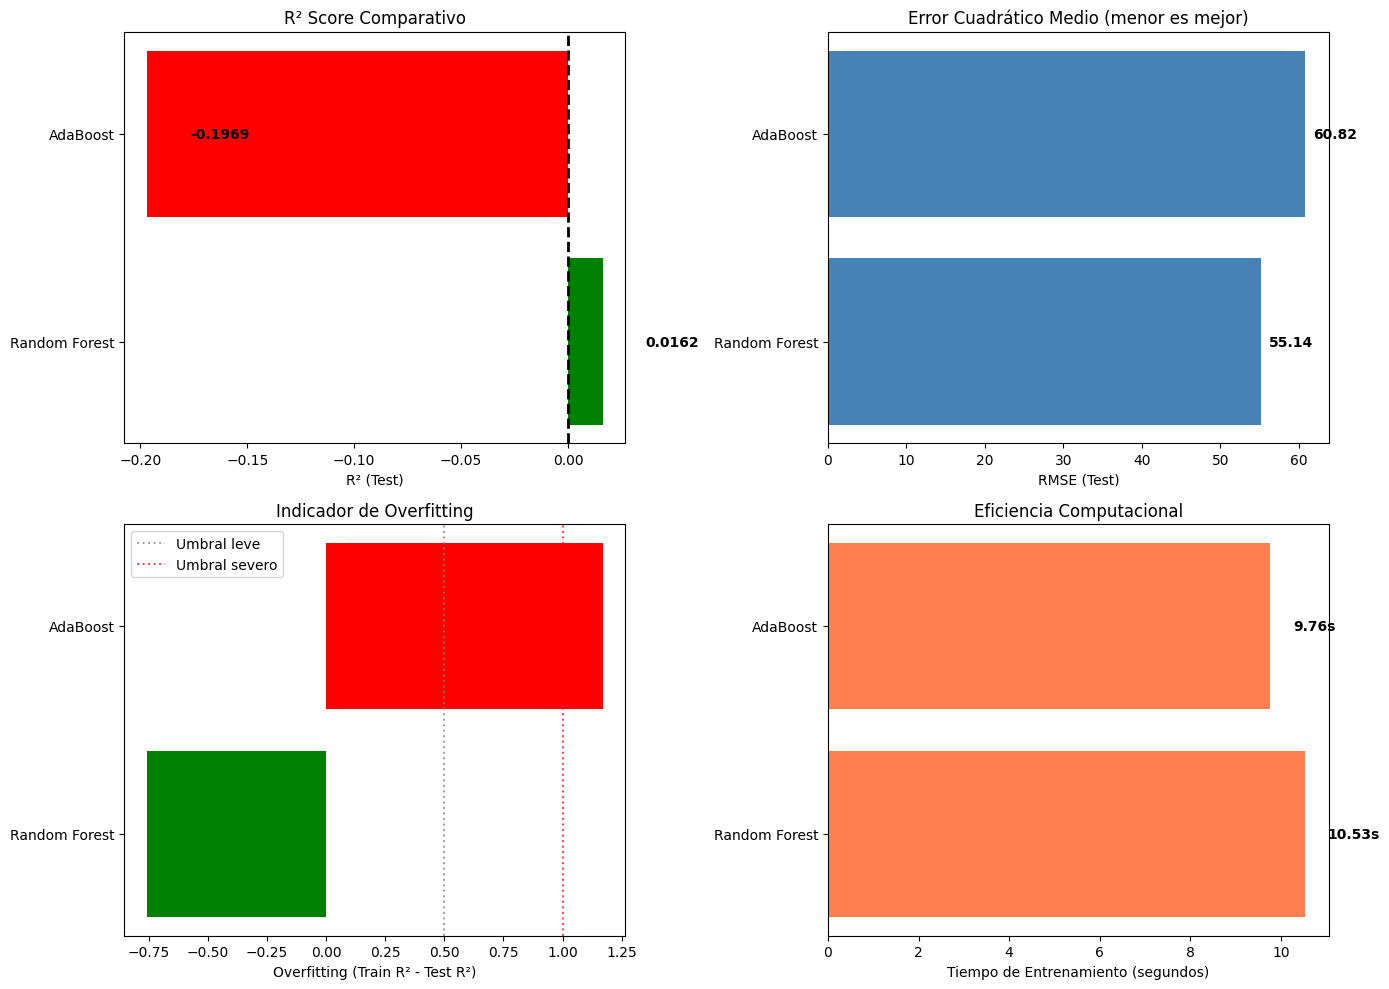


✓ Gráfico guardado: Comparativa_RF_vs_AdaBoost_Optimizados.png


In [50]:
# Comparativa de los 2 mejores modelos optimizados: Random Forest y AdaBoost

# Crear tabla comparativa con los mejores modelos
mejores_modelos_comparativa = pd.DataFrame({
    'Modelo': ['Random Forest', 'AdaBoost'],
    'Test_R2': [r2_test, r2_test_ada],
    'Test_RMSE': [rmse_test, rmse_test_ada],
    'Test_MAE': [mae_test, mae_test_ada],
    'Train_R2': [r2_train, r2_train_ada],
    'Overfitting': [overfitting, overfitting_ada],
    'Tiempo_Entrenamiento (s)': [
        grid_search_rf.cv_results_['mean_fit_time'].mean() * grid_search_rf.n_iter,
        grid_search_ada.cv_results_['mean_fit_time'].mean() * grid_search_ada.n_iter
    ]
})

print("="*120)
print("COMPARATIVA DE LOS 2 MEJORES MODELOS OPTIMIZADOS")
print("="*120)
print(mejores_modelos_comparativa.to_string(index=False))
print("="*120)

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: R² comparison
ax1 = axes[0, 0]
colors_r2 = ['green' if x > 0 else 'red' for x in mejores_modelos_comparativa['Test_R2']]
ax1.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_R2'], color=colors_r2)
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax1.set_xlabel('R² (Test)')
ax1.set_title('R² Score Comparativo')
for i, v in enumerate(mejores_modelos_comparativa['Test_R2']):
    ax1.text(v + 0.02, i, f'{v:.4f}', va='center', fontweight='bold')

# Plot 2: RMSE comparison
ax2 = axes[0, 1]
ax2.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Test_RMSE'], color='steelblue')
ax2.set_xlabel('RMSE (Test)')
ax2.set_title('Error Cuadrático Medio (menor es mejor)')
for i, v in enumerate(mejores_modelos_comparativa['Test_RMSE']):
    ax2.text(v + 1, i, f'{v:.2f}', va='center', fontweight='bold')

# Plot 3: Overfitting
ax3 = axes[1, 0]
colors_overfit = ['green' if x < 0.5 else 'orange' if x < 1.0 else 'red' for x in mejores_modelos_comparativa['Overfitting']]
ax3.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Overfitting'], color=colors_overfit)
ax3.set_xlabel('Overfitting (Train R² - Test R²)')
ax3.set_title('Indicador de Overfitting')
ax3.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7, label='Umbral leve')
ax3.axvline(x=1.0, color='red', linestyle=':', alpha=0.7, label='Umbral severo')
ax3.legend()

# Plot 4: Tiempo de entrenamiento
ax4 = axes[1, 1]
ax4.barh(mejores_modelos_comparativa['Modelo'], mejores_modelos_comparativa['Tiempo_Entrenamiento (s)'], color='coral')
ax4.set_xlabel('Tiempo de Entrenamiento (segundos)')
ax4.set_title('Eficiencia Computacional')
for i, v in enumerate(mejores_modelos_comparativa['Tiempo_Entrenamiento (s)']):
    ax4.text(v + 0.5, i, f'{v:.2f}s', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../Entregables/UdeBarcelona/Comparativa_RF_vs_AdaBoost_Optimizados.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Gráfico guardado: Comparativa_RF_vs_AdaBoost_Optimizados.png")

In [51]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# volvemos a entrenar el modelo Lasso sobre las mismas variables de interés
# y guardamos las métricas / coeficientes en un dataframe para consultarlo

# variables que ya habíamos seleccionado manualmente
features_interes = [
    'edad', 'pcr', 'glucosa', 'col_total', 'trigliceridos',
    'imc', 'ejercicio', 'horas_sueño', 'af_libre'
]

# filtrado por si alguna columna no existiera
X_select = X[[c for c in features_interes if c in X.columns]]

# escalado previo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_select)

# ajuste con LassoCV (5‑fold)
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# métricas sobre toda la muestra
r2_lasso = lasso.score(X_scaled, y)
mse_lasso = mean_squared_error(y, lasso.predict(X_scaled))
rmse_lasso = np.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y, lasso.predict(X_scaled))

print(f"R² ajustado con Lasso: {r2_lasso:.4f}")
print(f"RMSE del Lasso: {rmse_lasso:.4f}")
print(f"MAE del Lasso: {mae_lasso:.4f}")

# coeficientes no nulos
coef = pd.Series(lasso.coef_, index=X_select.columns)
coef = coef[coef != 0].sort_values(ascending=False)
print("\nVariables que el modelo consideró importantes:")
print(coef)

# si queremos mantener un registro junto a los demás modelos
# (df_ranking ya existe en el notebook con las otras comparativas)
nuevo = {
    'Modelo': 'Lasso',
    'Test_R2': r2_lasso,
    'Test_RMSE': rmse_lasso,
    'Test_MAE': mae_lasso,
    'Train_R2': r2_lasso,
    'Overfitting': 0.0
}
df_ranking = pd.concat([df_ranking, pd.DataFrame([nuevo])], ignore_index=True)

# mostrar la tabla actualizada
df_ranking

R² ajustado con Lasso: 0.1606
RMSE del Lasso: 18.2283
MAE del Lasso: 13.4466

Variables que el modelo consideró importantes:
ejercicio        4.663304
imc              2.325539
col_total        1.734239
trigliceridos    1.664959
glucosa          0.120413
af_libre        -3.836387
edad            -3.889342
dtype: float64


,Modelo,Test_R2,Test_R2_std,Test_RMSE,Test_MAE,Train_R2,Overfitting
0,RF,0.035714,0.109913,19.258924,14.976172,0.775687,0.739973
1,kNN,-0.014181,0.136125,19.568515,15.008421,0.292807,0.306988
2,SVM,-0.084556,0.090473,20.418128,15.133783,0.025007,0.109563
3,XGBoost,-0.186373,0.453941,20.453511,14.759123,0.979747,1.166119
4,DTree,-1.056090,1.149007,26.441684,19.692354,0.752668,1.808758
5,LR,-3.425124,1.727542,39.303384,30.901322,1.000000,4.425124
6,MLP,-4.232842,2.819989,45.531496,35.032511,0.960479,5.193321
7,Lasso,0.160597,NaN,18.228295,13.446604,0.160597,0.000000
8,Lasso,0.160597,NaN,18.228295,13.446604,0.160597,0.000000
9,Lasso,0.160597,NaN,18.228295,13.446604,0.160597,0.000000


## CONCLUSION

Tras evaluar diversos algoritmos de Machine Learning para predecir los niveles basales de BDNF, el equipo concluye que la alta variabilidad biológica y el tamaño reducido de la muestra (N=42) son los principales desafíos para el modelado:
- **Rendimiento y Complejidad:** Se observó un contraste significativo entre los enfoques. Mientras que los modelos no lineales como el **Random Forest** demostraron capacidad para capturar relaciones complejas, también mostraron una tendencia crítica al overfitting, lo que sugiere que gran parte de la varianza capturada puede ser ruido aleatorio.
- **Robustez vs. Sensibilidad:** Por el contrario, el modelo **Lasso** resultó ser el más estable para este set de datos. Su capacidad de realizar una selección automática de variables y "apagar" predictores ruidosos - permitió identificar que la relación entre los marcadores metabólicos y el BDNF basal es predominantemente simple y depende de un grupo pequeño de factores clave.